<a href="https://colab.research.google.com/github/sudeep-009/Airbnb-Analysis/blob/dev/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install folium
import numpy as np
import pandas as pd
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as ex
import folium
import warnings
warnings.filterwarnings('ignore')


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
airbnb_df = pd.read_csv('/content/drive/MyDrive/Self Projects/AirBnB Bookings Analysis/Airbnb NYC 2019.csv')

**Lets go through the head and tail of the dataset**

In [ ]:
pd.concat([airbnb_df.head(),airbnb_df.tail()])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


**Lets see the number of records and features present in this dataset**


In [5]:
airbnb_df.shape

(48895, 16)

Number of records is 48895

Number of features is 16

**Lets go through the name of features present in the dataset**

In [6]:
airbnb_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Lets have some idea about the features of the dataset**

In [7]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

**Lets see the null values present in the dataset**

In [8]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
airbnb_df.dropna(subset=['name','host_name'],axis=0,inplace=True)

In [10]:
airbnb_df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10037
reviews_per_month                 10037
calculated_host_listings_count        0
availability_365                      0
dtype: int64

**Our dataset is almost clean**

In [11]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#**Now lets start doing some Exploratory Data Analysis!!**

#**Q1) Most Popular neighbourhood group in terms of number of host**

In [12]:
popular_neighbourhood = airbnb_df.groupby('neighbourhood_group').agg({'name': 'count'}).reset_index().sort_values('name',ascending=False)
popular_neighbourhood.head()

,neighbourhood_group,name
2,Manhattan,21643
1,Brooklyn,20089
3,Queens,5664
0,Bronx,1089
4,Staten Island,373


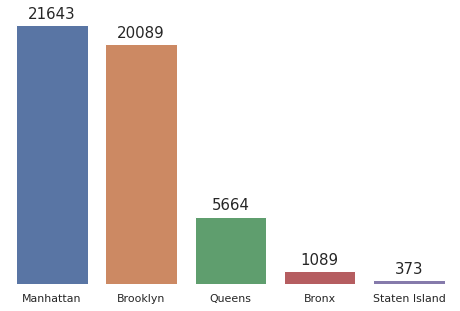

In [28]:
sns.set_theme(rc={'figure.figsize': (8,5)},style='whitegrid',palette='deep')
bars = sns.barplot(x='neighbourhood_group',y='name',data=popular_neighbourhood)
ax = plt.gca()
ax.axes.set_xlabel('')
ax.axes.set_ylabel('')
ax.axes.yaxis.set_ticklabels([])
for spine in ax.spines.values():
  spine.set_visible(False)
plt.grid(False)
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()+250),ha='center',va='center',size=15, xytext=(0, 8),
                   textcoords='offset points')


**Findings:**

Most number of host are in Manhattan neighbourhood group

#**Q2)Most Popular Neighbourhood in terms of number of host?**

In [37]:
neighbourhood_df = airbnb_df.groupby('neighbourhood').agg({'id': 'count'}).reset_index().sort_values('id',ascending=False).head(15)

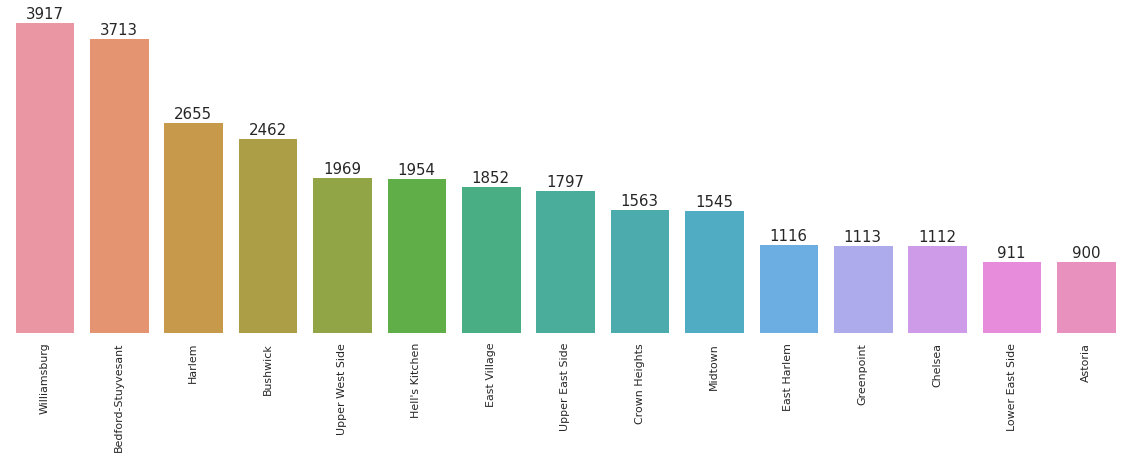

In [42]:
sns.set_theme(style='white', palette='pastel', rc={'figure.figsize': (20,6)})
bars = sns.barplot(data=neighbourhood_df,x='neighbourhood',y='id')
ax=plt.gca()
ax.axes.set_ylabel('')
ax.axes.set_xlabel('')
ax.axes.yaxis.set_ticklabels([])
plt.xticks(rotation=90)
plt.grid(False)
for spine in ax.spines.values():
  spine.set_visible(False)
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),
                (bar.get_x()+bar.get_width()/2,bar.get_height()),ha='center',va='center',size=15,xytext=(0,8),textcoords='offset points')


**Findings:**

Based on Number of host Williamsburg is in the top spot followed by Bedford-Stuyevesant

#**Q3) Hosts having most number of reviews?**

In [78]:
maxreview_host = airbnb_df.groupby(['host_id','host_name']).agg({'number_of_reviews': np.sum}).reset_index().sort_values('number_of_reviews',ascending=False).head(15)
maxreview_host

,host_id,host_name,number_of_reviews
21294,37312959,Maya,2273
1052,344035,Brooklyn& Breakfast -Len-,2205
18619,26432133,Danielle,2017
20863,35524316,Yasu & Akiko,1971
21911,40176101,Brady,1818
7361,4734398,Jj,1798
14704,16677326,Alex And Zeena,1355
9199,6885157,Randy,1346
34615,219517861,Sonder (NYC),1281
17511,23591164,Angela,1269


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

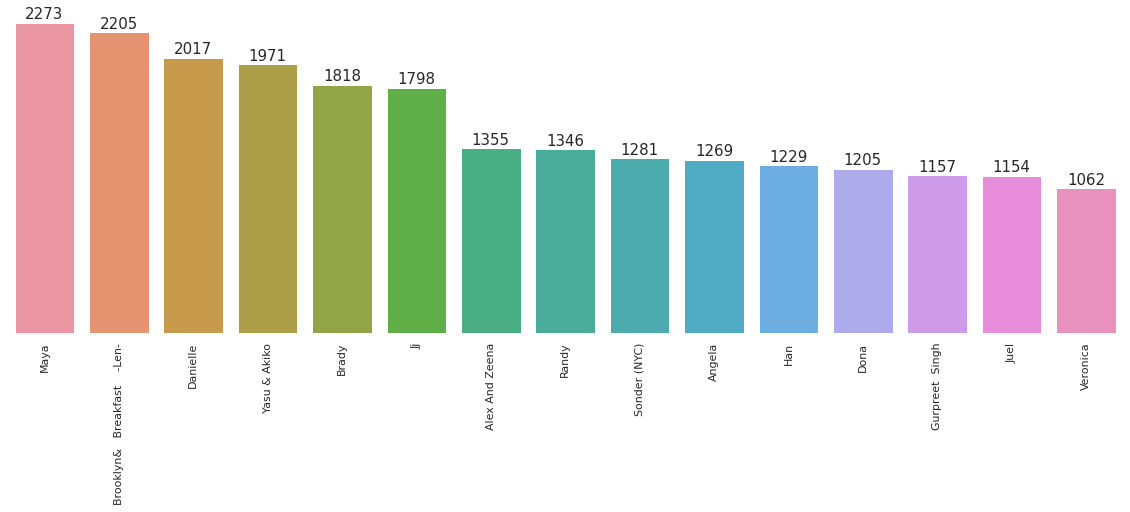

In [79]:
sns.set_theme(style='whitegrid',palette='dark',rc={'figure.figsize': (20,6)})
bars = sns.barplot(data=maxreview_host, x='host_name', y='number_of_reviews')
ax=plt.gca()
ax.axes.set_ylabel('')
ax.axes.set_xlabel('')
ax.axes.yaxis.set_ticklabels([])
plt.grid(False)
for spine in ax.spines.values():
  spine.set_visible(False)
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),va='center',ha='center',xytext=(0,8),textcoords='offset points',size=15)
plt.xticks(rotation=90)

**Findings:**

So we see that Michael,David,Sonder(NYC),John,Alex have maximum number of review. Let dig deeper into the details of these hosts. So these host seems quite popular among the people.

#**Q4:) Which host has maximum number of hotel?**

In [83]:
maxhotel_host = airbnb_df.groupby(['host_id','host_name']).agg({'id': 'count'}).reset_index().sort_values('id',ascending=False).head(15)
maxhotel_host

,host_id,host_name,id
34615,219517861,Sonder (NYC),327
29379,107434423,Blueground,232
19557,30283594,Kara,121
31050,137358866,Kazuya,103
12796,12243051,Sonder,96
14426,16098958,Jeremy & Laura,96
25637,61391963,Corporate Housing,91
17079,22541573,Ken,87
33837,200380610,Pranjal,65
3041,1475015,Mike,52


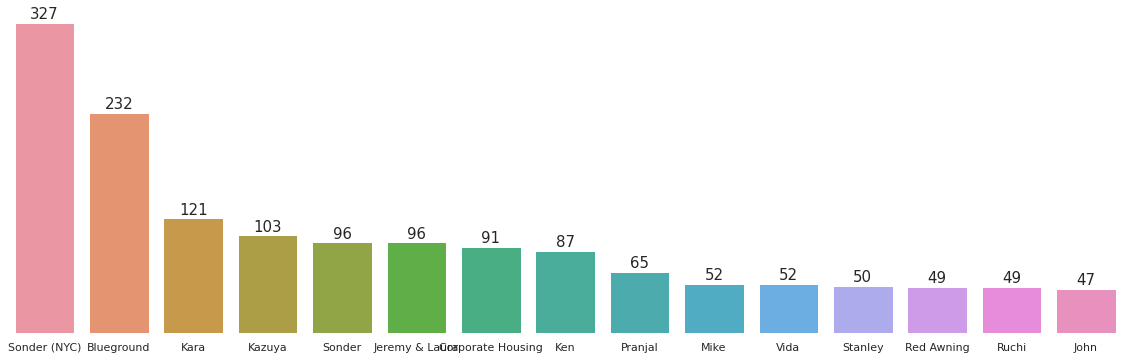

In [82]:
sns.set_theme(style='whitegrid',palette='dark',rc={'figure.figsize': (20,6)})
bars = sns.barplot(data=maxhotel_host, x='host_name', y='id')
ax=plt.gca()
ax.axes.set_ylabel('')
ax.axes.set_xlabel('')
ax.axes.yaxis.set_ticklabels([])
plt.grid(False)
for spine in ax.spines.values():
  spine.set_visible(False)
for bar in bars.patches:
  bars.annotate(format(bar.get_height(),'.0f'),(bar.get_x()+bar.get_width()/2,bar.get_height()),va='center',ha='center',xytext=(0,8),textcoords='offset points',size=15)


**Findings:**

Sonder(NYC) have maximum number of places. Lets dig deeper into his data.

In [84]:
airbnb_df[airbnb_df['host_id']==219517861]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
38293,30181691,Sonder | 180 Water | Incredible 2BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70637,-74.00645,Entire home/apt,302,29,0,NaN,NaN,327,309
38294,30181945,Sonder | 180 Water | Premier 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70771,-74.00641,Entire home/apt,229,29,1,2019-05-29,0.73,327,219
38588,30347708,Sonder | 180 Water | Charming 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70743,-74.00443,Entire home/apt,232,29,1,2019-05-21,0.60,327,159
39769,30937590,Sonder | The Nash | Artsy 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74792,-73.97614,Entire home/apt,262,2,8,2019-06-09,1.86,327,91
39770,30937591,Sonder | The Nash | Lovely Studio + Rooftop,219517861,Sonder (NYC),Manhattan,Murray Hill,40.74771,-73.97528,Entire home/apt,255,2,14,2019-06-10,2.59,327,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47691,35871510,Sonder | 116 John | Vibrant Studio + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70818,-74.00631,Entire home/apt,135,29,0,NaN,NaN,327,339
47692,35871511,Sonder | 116 John | Vibrant 1BR + Fitness Room,219517861,Sonder (NYC),Manhattan,Financial District,40.70691,-74.00682,Entire home/apt,165,29,0,NaN,NaN,327,342
47693,35871515,Sonder | 116 John | Stunning 1BR + Rooftop,219517861,Sonder (NYC),Manhattan,Financial District,40.70772,-74.00673,Entire home/apt,165,29,0,NaN,NaN,327,347
47814,35936418,Sonder | 116 John | Polished Studio + Gym,219517861,Sonder (NYC),Manhattan,Financial District,40.70840,-74.00518,Entire home/apt,699,29,0,NaN,NaN,327,327
